In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import chardet                                   #to solve encoding error
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df=pd.read_csv("spam.csv",encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3503,ham,Will you be here for food,NaN,NaN,NaN
4279,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
1110,ham,Ok ill tell the company,NaN,NaN,NaN
5310,ham,"yeah, that's what I was thinking",NaN,NaN,NaN
4418,ham,How have your little darlings been so far this...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Data cleaning
# EDA
# Text PreProcessing
# Model Building
# Evaluation
# Improvements
# Website
# Deploy

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [9]:
df.shape

(5572, 2)

In [10]:
#renaming the cols

df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [11]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df=df[["Text","Target"]]

In [13]:
df.head()

,Text,Target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df["Target"]=encoder.fit_transform(df["Target"])

In [16]:
df.head()

,Text,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
# missing values

In [18]:
df.isnull().sum()

Text      0
Target    0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep="first",inplace=True)

In [21]:
df.shape

(5169, 2)

## EDA

In [22]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

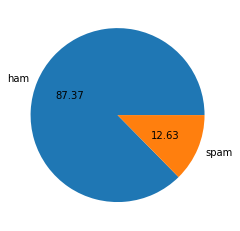

In [23]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#fetching number of characters

df["num_characters"]=df["Text"].apply(len)

In [28]:
df.head()

,Text,Target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [29]:
#fetching number of words

df["num_words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,Text,Target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [31]:
#fetching number of sentences

df["num_sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,Text,Target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [33]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [34]:
df[df["Target"]== 0].describe()      #ham

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [35]:
df[df["Target"]== 1].describe()  #spam

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [36]:
import seaborn as sns

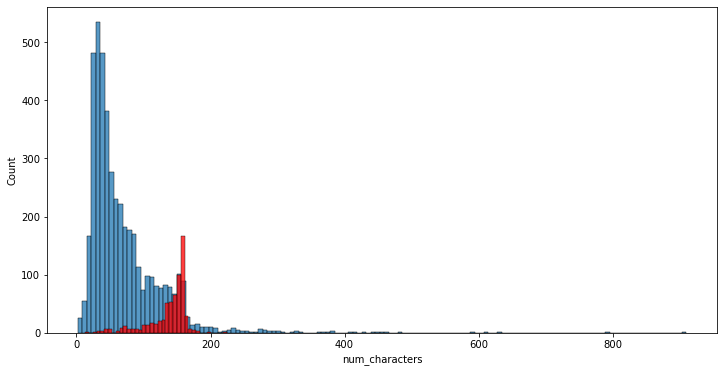

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"],color="red")
plt.show()

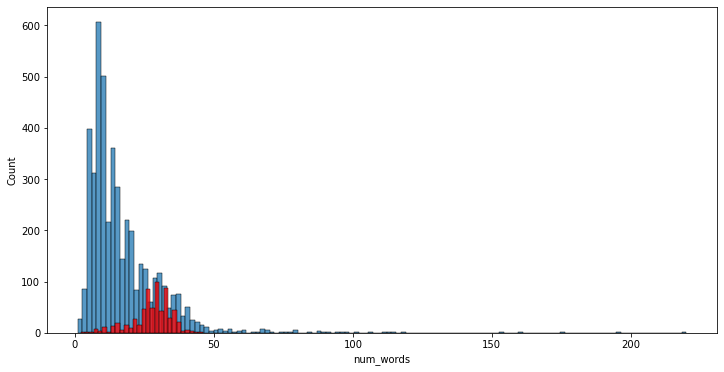

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]==0]["num_words"])
sns.histplot(df[df["Target"]==1]["num_words"],color="red")
plt.show()

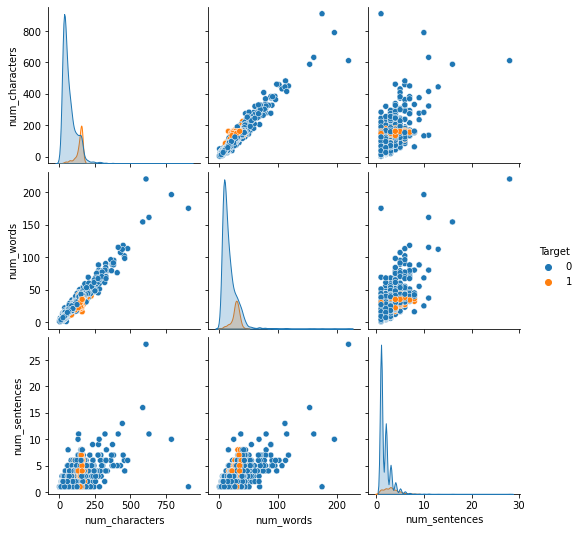

In [39]:
sns.pairplot(df,hue="Target")

In [40]:
df.corr(method="pearson")

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


## Multicollinearity Check

<AxesSubplot:>

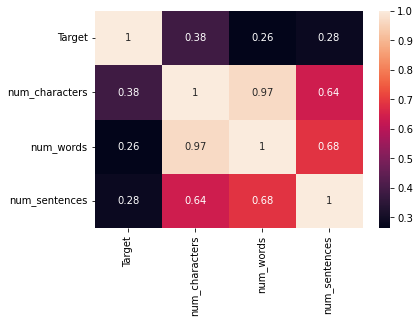

In [41]:
sns.heatmap(df.corr(method="pearson"),annot=True)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[["num_characters","num_words","num_sentences"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns
print(vif)

         VIF        Features
0  42.532684  num_characters
1  49.076472       num_words
2   5.030674   num_sentences


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[["num_characters","num_sentences"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns
print(vif)

        VIF        Features
0  4.318021  num_characters
1  4.318021   num_sentences


we will remove the column with highest multicollinearity

## Data Preprocessing
- Lower case
- tokenize
- removing special character
- removing stopwords and punctuation
- stemmming

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [49]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    L=[]
    for i in text:
        if i.isalnum():
            L.append(i)
    
    text=L[:]          #copying list
    L.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            L.append(i)
    
    text=L[:]
    L.clear()
    
    for i in text:
        L.append(ps.stem(i))
    
    
    return " ".join(L)

In [50]:
transform_text("Imagine you finally get to sink into that bath after I have put you through your paces, maybe even having you eat me for a while before I left ... But also imagine the feel of that cage on your cock surrounded by the bath water, reminding you always who owns you ... Enjoy, my cuck")

'imagin final get sink bath put pace mayb even eat left also imagin feel cage cock surround bath water remind alway own enjoy cuck'

In [51]:
df["Trans_Text"]=df["Text"].apply(transform_text)

In [52]:
df.head()

,Text,Target,num_characters,num_words,num_sentences,Trans_Text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [53]:
df=df[["Text","num_characters","num_words","num_sentences","Trans_Text","Target"]]

In [54]:
df.head()

,Text,num_characters,num_words,num_sentences,Trans_Text,Target
0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0
1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,0


Building the word cloud

In [71]:
from wordcloud import WordCloud                                  #conda install -c https://conda.anaconda.org/conda-forge wordcloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

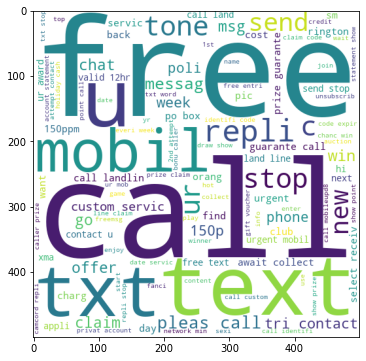

In [73]:
spam_wc=wc.generate(df[df["Target"]==1]["Trans_Text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

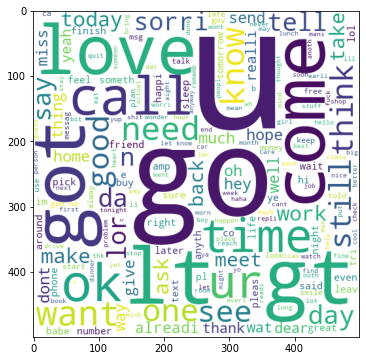

In [76]:
ham_wc=wc.generate(df[df["Target"]==0]["Trans_Text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [81]:
spam_corpus=[]
for msg in df[df["Target"]==1]["Trans_Text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [82]:
len(spam_corpus)

9939

In [85]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\arpan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


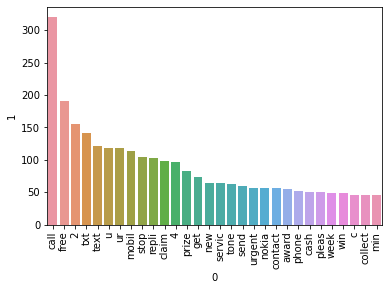

In [88]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [89]:
ham_corpus=[]
for msg in df[df["Target"]==0]["Trans_Text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [90]:
len(ham_corpus)

35394

C:\Users\arpan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


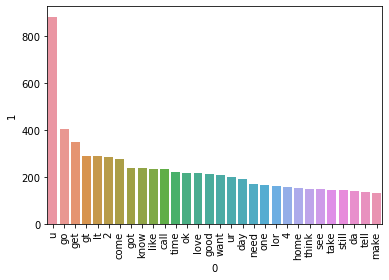

In [91]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

Naive Bayes performs better on text data

## Model Building

In [191]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

## using Bag of words

In [94]:
X=cv.fit_transform(df["Trans_Text"]).toarray()

In [98]:
y=df["Target"].values

In [99]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [107]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [108]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [109]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## using tfidf

In [212]:
X=tfidf.fit_transform(df["Trans_Text"]).toarray()

In [221]:
#appending the num_character col to X

X=np.hstack((X,df["num_characters"].values.reshape(-1,1)))

In [222]:
X.shape

(5169, 3001)

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [194]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [195]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [241]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [197]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [198]:
# tfidf---> MNB

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [200]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [201]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [202]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [205]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [206]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


C:\Users\arpan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [183]:
performance=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [184]:
performance

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,xgb,0.969052,0.934426
8,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


In [207]:
temp=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_3000":accuracy_scores,"Precision_3000":precision_scores}).sort_values("Precision_3000",ascending=False)

In [208]:
temp

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
9,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
8,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.927466,0.811881


In [188]:
performance1=pd.melt(performance,id_vars="Algorithm",value_vars=["Accuracy","Precision"])

In [189]:
performance1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,LR,Accuracy,0.951644
6,xgb,Accuracy,0.969052
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.936170


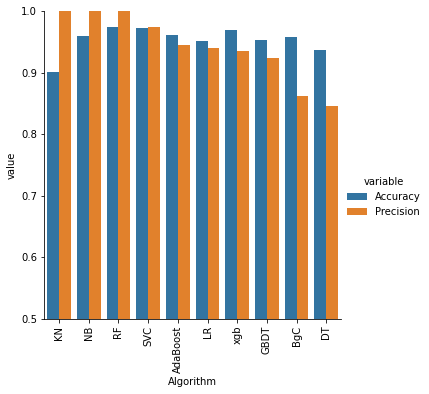

In [190]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [211]:
new_df=performance.merge(temp,on="Algorithm")
new_df

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,SVC,0.972921,0.974138,0.975822,0.974790
4,AdaBoost,0.961315,0.945455,0.960348,0.929204
5,LR,0.951644,0.940000,0.958414,0.970297
6,xgb,0.969052,0.934426,0.971954,0.943089
7,GBDT,0.952611,0.923810,0.947776,0.920000
8,BgC,0.958414,0.862595,0.957447,0.867188
9,DT,0.936170,0.846154,0.927466,0.811881


In [236]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
knc=KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

In [237]:
voting=VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ("RF",rfc),("KN",knc)],voting="hard")

In [238]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('KN', KNeighborsClassifier())])

In [239]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9680851063829787
Precision 1.0


In [240]:
# Multinomial is the final model

In [242]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))